# Kernel Regression

In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('../data/processed/rollingsales_manhattan_clean.csv')
df = df.drop('Unnamed: 0',axis=1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['GROSS SQUARE FEET'], df['SALE PRICE'], test_size=0.20, random_state=0)

X_test.shape

(327,)

In [23]:
# kernel => weighting function to smooth out discontinuities.
# Accepts an array of distances and return an array of the same shape containing weights.

#np.seterr(divide='ignore', invalid='ignore')
pi = np.pi

def gaussian_kernel(distances):
    weights = []
    for neighborhood in distances:
        nw = []
        for dist in neighborhood:
            nw.append((1/np.sqrt(2*pi))*np.exp(-0.5*((dist/300)**2)))
        weights.append(nw)

    return weights


def epanechnikov_kernel(distances):         
    weights = []
    for neighborhood in distances:
        nw = []
        for dist in neighborhood:
            if np.abs(dist/1000) <= 1:
                nw.append((3/4)*(1-(dist/1000)**2))
            else:
                nw.append(0)
        weights.append(nw)

    return weights

def logistic_kernel(distances):
    weights = []
    for i in range(len(distances)):
        dist = distances[i]
        weights.append(1/(np.exp(dist)+2+np.exp(-dist)))

    return weights

/Users/unchitta/anaconda/lib/python3.6/site-packages/sklearn/neighbors/regression.py:160: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


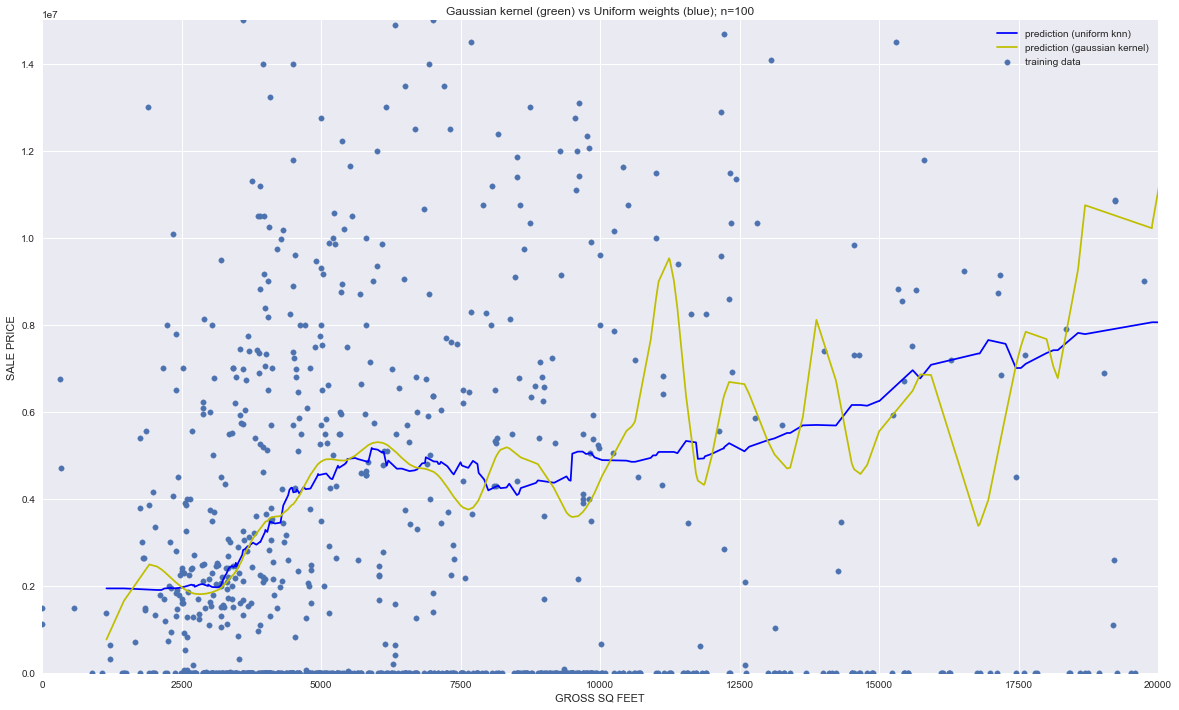

In [31]:
from sklearn.neighbors import KNeighborsRegressor

T = sorted(X_test.values.reshape(-1,1))

knn = KNeighborsRegressor(n_neighbors=200, weights=gaussian_kernel)
knn.fit(X_train.values.reshape(-1,1), y_train)
y_preds = knn.predict(T)

knn2 = KNeighborsRegressor(n_neighbors=200, weights='uniform')
knn2.fit(X_train.values.reshape(-1,1), y_train)
y_preds_uniform = knn2.predict(T)

plt.figure(figsize=(20, 12))
plt.ylim([0,15000000])
plt.xlim([0,20000])
#plt.scatter(T,y_preds, label='testing data', marker='.', c='r',s=30)
plt.scatter(X_train,y_train, label='training data', s=30)
plt.plot(T,y_preds_uniform, label='prediction (uniform knn)', c='b')
plt.plot(T,y_preds, label='prediction (gaussian kernel)', c='y')
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.title('Gaussian kernel (green) vs Uniform weights (blue); n=100')
plt.legend()

plt.show()


In [6]:
df2 = df[df['SALE PRICE'] > 0]

In [7]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2['GROSS SQUARE FEET'], df2['SALE PRICE'], test_size=0.20, random_state=0)

X_test2.shape

(185,)

/Users/unchitta/anaconda/lib/python3.6/site-packages/sklearn/neighbors/regression.py:160: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


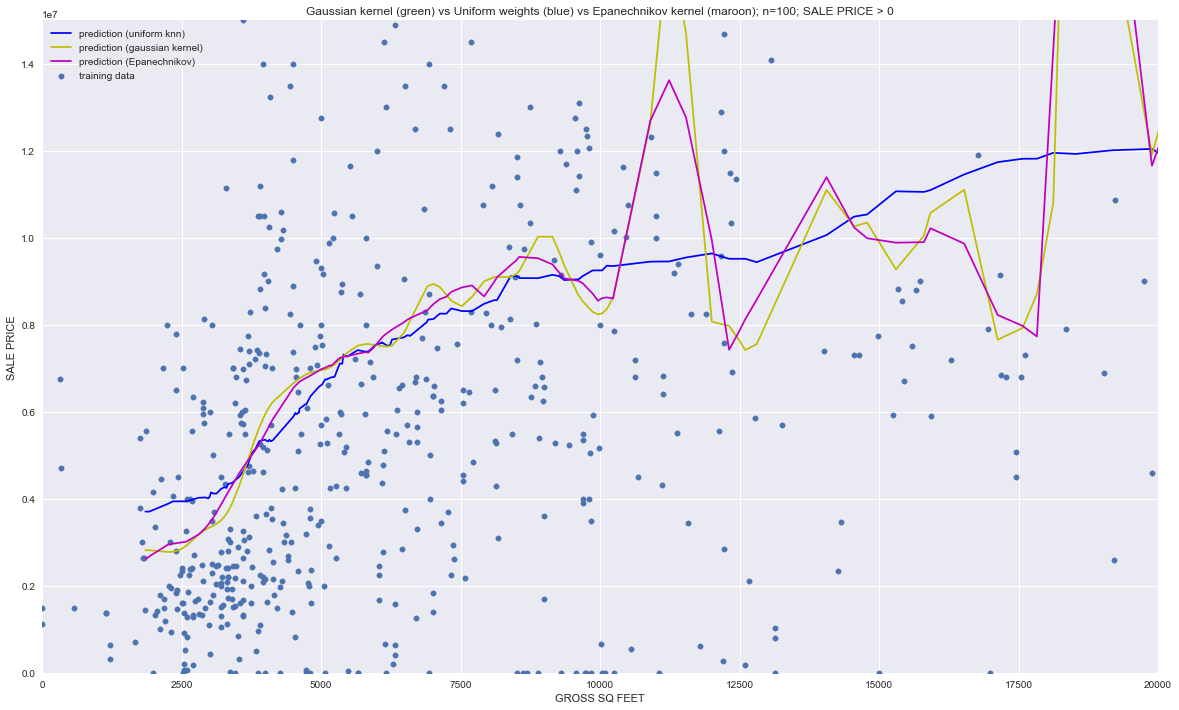

In [32]:
T2 = sorted(X_test2.values.reshape(-1,1))

knn3 = KNeighborsRegressor(n_neighbors=200, weights=epanechnikov_kernel)

knn.fit(X_train2.values.reshape(-1,1), y_train2)
y_preds2 = knn.predict(T2)

knn2.fit(X_train2.values.reshape(-1,1), y_train2)
y_preds_uniform2 = knn2.predict(T2)

knn3.fit(X_train2.values.reshape(-1,1), y_train2)
y_preds_epa2 = knn3.predict(T2)

plt.figure(figsize=(20, 12))
plt.ylim([0,15000000])
plt.xlim([0,20000])
#plt.scatter(T,y_preds, label='testing data', marker='.', c='r',s=30)
plt.scatter(X_train2,y_train2, label='training data', s=30)
plt.plot(T2,y_preds_uniform2, label='prediction (uniform knn)', c='b')
plt.plot(T2,y_preds2, label='prediction (gaussian kernel)', c='y')
plt.plot(T2,y_preds_epa2, label='prediction (Epanechnikov)', c='m')

plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.title('Gaussian kernel (green) vs Uniform weights (blue) vs Epanechnikov kernel (maroon); n=100; SALE PRICE > 0')
plt.legend()

plt.show()